# Notebook to export (T)CAV Accuracy results 

In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
PATH = '/work3/s174498/nlp_tcav_results/'
PATH_save = '/zhome/94/5/127021/speciale/master_project/src/visualization/table/'

In [3]:
layers = ['roberta.encoder.layer.0.output.dropout',
             'roberta.encoder.layer.1.output.dropout',
             'roberta.encoder.layer.2.output.dropout',
             'roberta.encoder.layer.3.output.dropout',
             'roberta.encoder.layer.4.output.dropout',
             'roberta.encoder.layer.5.output.dropout',
             'roberta.encoder.layer.6.output.dropout',
             'roberta.encoder.layer.7.output.dropout',
             'roberta.encoder.layer.8.output.dropout',
             'roberta.encoder.layer.9.output.dropout',
             'roberta.encoder.layer.10.output.dropout',
             'roberta.encoder.layer.11.output.dropout'
            ]


### Sports

In [4]:
#mat = np.zeros((len(concepts),12))

In [12]:
folders =  ['Acrobatic sports','Air sports','Aquatic and paddle sports',
 'Archery','Athletics','Bat and ball games','Board game','Boardsport','Card game','Catching games','Climbing',
 'Combat sports','Cycling','Dog sports','Electronic sports','Equestrian sports','Esports','Fishing','Flying disc sports',
 'Gymnastics','Hunting','Ice sports','Invasion games','Kite sports','Marker sports','Mixed discipline','Motersport',
 'Net and wall games','Orienteering family','Other','Other mind sports','Overlapping sports','Parkour Freerunning',
 'Remote control','Rodeo','Running','Sailing','Shooting sports','Skating sports','Snow sports','Speedcubing',
 'Stacking','Street sports','Strength sports','Table sports','Tag game','Target sport','Walking','Weightlifting']

concepts = list(map(lambda x: x.lower(), folders))
concepts = [x.replace(' ','_') for x in concepts]

In [13]:
target = 'positive'
results = '_sport'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')


concepts = list(data[target].keys())

#col = []
mat = np.zeros((len(concepts)-1,12))

idx = [None]* (len(concepts))
count = 0
for j, con in enumerate(concepts):
    if con == 'random':
        A = 'nope'
    else:
        for i, lay in enumerate(layers):
            acc = np.around(np.mean(data[target][con][lay]['acc']),4)
            mat[count,i] = acc
            idx[count] = con
        count = count + 1    

got that data


In [11]:
folders =  ['Acrobatic sports','Air sports','Aquatic and paddle sports',
 'Archery','Athletics','Bat and ball games','Board game','Boardsport','Card game','Catching games','Climbing',
 'Combat sports','Cycling','Dog sports','Electronic sports','Equestrian sports','Esports','Fishing','Flying disc sports',
 'Gymnastics','Hunting','Ice sports','Invasion games','Kite sports','Marker sports','Mixed discipline','Motersport',
 'Net and wall games','Orienteering family','Other','Other mind sports','Overlapping sports','Parkour Freerunning',
 'Remote control','Rodeo','Running','Sailing','Shooting sports','Skating sports','Snow sports','Speedcubing',
 'Stacking','Street sports','Strength sports','Table sports','Tag game','Target sport','Walking','Weightlifting']

concepts = list(map(lambda x: x.lower(), folders))
concepts = [x.replace(' ','_') for x in concepts]

In [18]:
df_ = pd.DataFrame(mat, index=folders)

In [19]:
df_.shape

(49, 12)

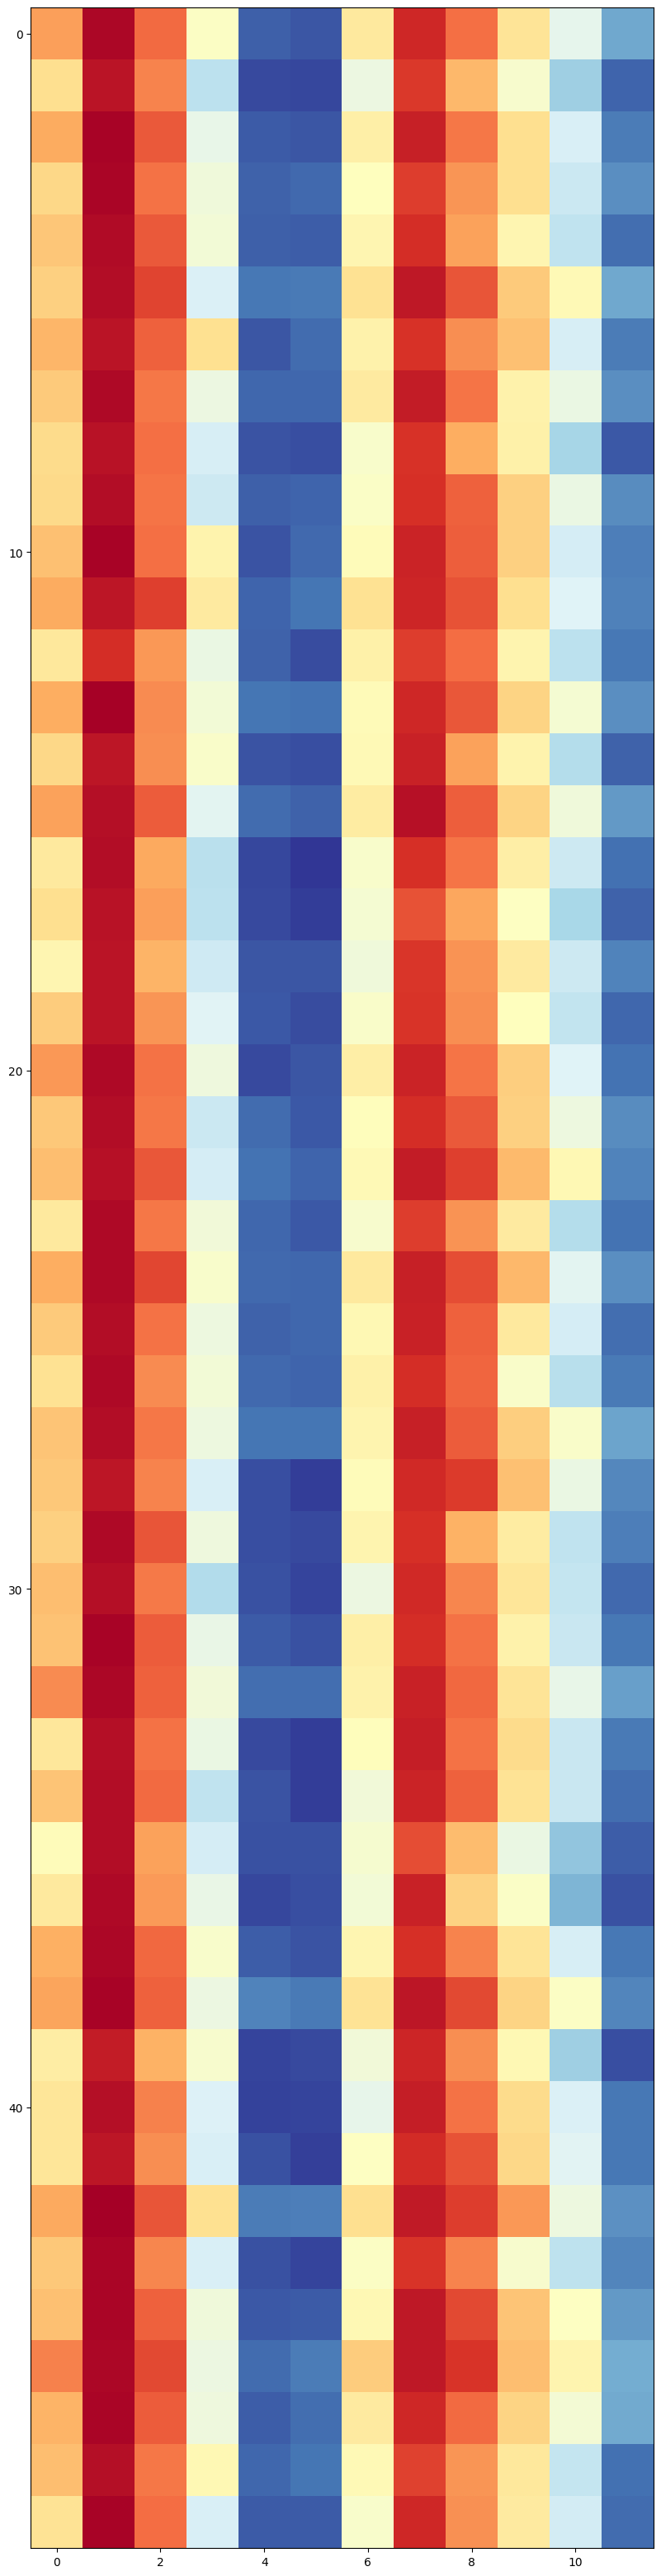

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,40))
plt.imshow(df, cmap ="RdYlBu")
 

In [21]:
#df
import seaborn as sns

#sns.heatmap(df_)
df.style.background_gradient(cmap='Blues')

,0,1,2,3,4,5,6,7,8,9,10,11
Acrobatic sports,0.632200,0.515400,0.595200,0.735100,0.922000,0.928300,0.699100,0.544200,0.598100,0.691900,0.765200,0.867100
Air sports,0.686000,0.527500,0.613300,0.804500,0.937900,0.939400,0.757300,0.559300,0.651500,0.741800,0.827800,0.918500
Aquatic and paddle sports,0.640200,0.512300,0.582300,0.762900,0.925000,0.928500,0.708900,0.537100,0.603100,0.686400,0.779800,0.900600
Archery,0.677900,0.514200,0.600800,0.751100,0.921000,0.915600,0.729400,0.561300,0.623900,0.685900,0.790800,0.888100
Athletics,0.662300,0.518200,0.582200,0.749000,0.922200,0.924000,0.716400,0.549900,0.632600,0.717100,0.800100,0.911700
Bat and ball games,0.672000,0.520800,0.566500,0.778500,0.904400,0.903600,0.688600,0.530100,0.578900,0.665900,0.722200,0.866800
Board game,0.649900,0.526600,0.588500,0.686800,0.928500,0.913900,0.711400,0.553800,0.619600,0.658200,0.781400,0.900600
Boardsport,0.667200,0.517700,0.603500,0.756700,0.916500,0.916800,0.700600,0.534300,0.602900,0.711800,0.758800,0.887300
Card game,0.682700,0.525400,0.599400,0.781500,0.931000,0.933600,0.739700,0.552600,0.641700,0.709100,0.821800,0.927500
Catching games,0.681000,0.519600,0.602400,0.790600,0.922600,0.919200,0.735300,0.551600,0.589000,0.671700,0.759000,0.889200


In [29]:
table = df.to_latex()
with open(PATH_save+"sport_concept.tex", "w") as f:
    f.write(table)

/tmp/ipykernel_1212/3674757274.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = df.to_latex()


### Gender

In [25]:
target = 'positive'

results = '_gender_layer_dropout_0_11_probs'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(data[target].keys())

col = []
mat = np.zeros((12,len(concepts)+1))
mat[:,0] = range(12)
col = [None]* (len(concepts)+1)
col[0] = 'layer'
correct = 1
for j, con in enumerate(concepts):
    if con == 'random':
        j = -1
        correct = 0
    for i, lay in enumerate(layers):
        acc = np.around(np.mean(data[target][con][lay]['acc']),4)
        mat[i,j+correct] = acc
        col[j+correct] = con
        

got that data


In [28]:

random_wiki = pd.DataFrame(mat,columns = col)
random_wiki['layer'] = random_wiki['layer'].astype('int')
random_wiki['random'] = random_wiki['random'].astype('float64')
#

In [31]:
table = random_wiki.to_latex(index = False)
with open(PATH_save+"gender_concept.tex", "w") as f:
    f.write(table)

/tmp/ipykernel_3439/3000843035.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = random_wiki.to_latex(index = False)


In [32]:
target = 'positive'

results = '_tweets_layer_dropout_0_11_probs'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

concepts = list(data[target].keys())

col = []
mat = np.zeros((12,len(concepts)+1))
mat[:,0] = range(12)
col = [None]* (len(concepts)+1)
col[0] = 'layer'
correct = 1
for j, con in enumerate(concepts):
    if con == 'random':
        j = -1
        correct = 0
    for i, lay in enumerate(layers):
        acc = np.around(np.mean(data[target][con][lay]['acc']),4)
        mat[i,j+correct] = acc
        col[j+correct] = con

got that data


In [33]:
random_wiki = pd.DataFrame(mat,columns = col)
random_wiki['layer'] = random_wiki['layer'].astype('int')
#random_wiki['random'] = random_wiki['random'].astype('float64')

In [34]:
table = random_wiki.to_latex(index = False)
with open(PATH_save+"tweets_concept.tex", "w") as f:
    f.write(table)

/tmp/ipykernel_3439/3480837285.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = random_wiki.to_latex(index = False)
